In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
param_name = 'chargeSpeed'
expt_type = 'playfight/without_cover_story/sentiment_analyses/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [3]:
df = pd.read_csv(f'{rootfile_loc}/data_with_sentiment_scores.csv', index_col=[0])
df = df.reset_index()
df

,index,subID,stimset_rows,chargeSpeed,stim_dur,responses,movie,trial_num,neg_score,neu_score,pos_score,pos-neg,pos-neu,neg-neu,neu-neg
0,5,28024,65,1.5,7962,now they slowly met and touched twice,1b1159fc-de2b-4ae5-a736-d98d8524a366,5,0.003994,0.731555,0.264451,0.260457,-0.467103,-0.727561,0.727561
1,3,28022,59,1.5,8002,The dots meet each other warmly.,1a8cf3c1-690b-449c-bb36-fd3b251837c1,3,0.004204,0.169153,0.826644,0.822440,0.657491,-0.164949,0.164949
2,3,28083,46,1.5,8083,both meeting each other,50919f52-6a9c-4824-b24f-2f1aebd58e1b,3,0.005532,0.861102,0.133366,0.127834,-0.727736,-0.855570,0.855570
3,1,28050,98,1.5,8648,slowly came together,8ed7c0fc-1490-4e35-a000-7f7357a0772a,1,0.006125,0.355109,0.638766,0.632641,0.283657,-0.348984,0.348984
4,1,28070,26,1.5,8284,The dots moved to the left and down and collid...,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,1,0.006636,0.873458,0.119906,0.113270,-0.753552,-0.866822,0.866822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,4,28056,4,9.0,8167,The white dot attacked the black dot.,abb20336-74c4-448b-a5f7-252c765a55f4,4,0.482806,0.497981,0.019213,-0.463593,-0.478769,-0.015176,0.015176
717,6,28022,59,9.0,8031,The dots looked like enemy of each other and f...,5b2465b2-47b6-4cc7-b06f-c362ff7454f8,6,0.493080,0.482383,0.024537,-0.468543,-0.457846,0.010698,-0.010698
718,5,28058,13,9.0,9886,the two dots seem to be fighting,6a57f963-5846-4eaa-a5d2-0e658499a4a9,5,0.500883,0.477192,0.021925,-0.478958,-0.455267,0.023691,-0.023691
719,3,28085,51,9.0,8101,Hitting each other,9301277e-6b35-4aa7-bd52-4f56ae0f029b,3,0.543805,0.415098,0.041097,-0.502707,-0.374001,0.128706,-0.128706


In [4]:
sum_sentiments = (df['pos_score'] + df['neg_score'] + df['neu_score'])
sum_sentiments.describe()

count    7.210000e+02
mean     1.000000e+00
std      7.042515e-08
min      9.999998e-01
25%      9.999999e-01
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [19]:
import matplotlib.pyplot as plt
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [20]:
param_name = 'chargeSpeed'

In [21]:
results_dir = '../../results/text_analysis/pf/no_cover_story/'

In [22]:
# fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(10,5), sharey=True,sharex=True)
# ax = axs[0]

# sns.boxplot(data = df, x = param_name, y = 'neg_score', ax = ax, color='grey')
# sns.stripplot(data = df, x = param_name, y = 'neg_score', ax = ax)
# ax.set_title('Negative score')

# ax = axs[1]
# sns.boxplot(data = df, x = param_name, y = 'pos_score', ax = ax, color='grey')
# sns.stripplot(data = df, x = param_name, y = 'pos_score', ax = ax)
# ax.set_title('Positive score')

# plt.suptitle('Sentiment scores')
# plt.tight_layout()

In [23]:
colors_plot = 'tab:red'

In [31]:
param_name

'chargeSpeed'

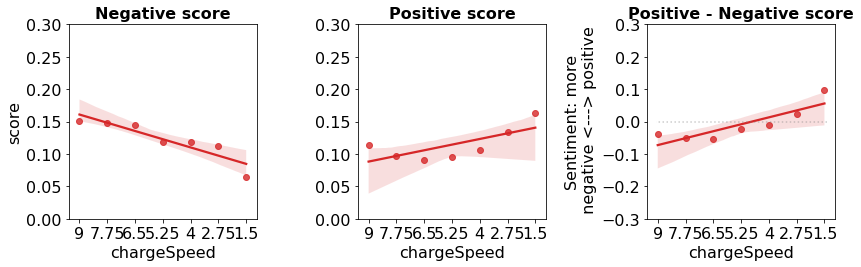

In [36]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4), sharey=False,sharex=True)
ax = axs[0]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='neg_score',  ax=ax, marker = 'o', color=colors_plot)#, legend=False)
ax.set_title('Negative score', fontweight = 'bold')
ax.set_ylabel('score')
ax.set_xticks(np.unique(df[param_name]))
ax.set_ylim(0,.3)
ax.invert_xaxis()

ax = axs[1]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='pos_score', ax=ax,marker = 'o', color=colors_plot)#,legend=False)
ax.set_title('Positive score', fontweight = 'bold')
ax.set_ylabel('')
ax.set_ylim(0,.3)
ax.invert_xaxis()

ax = axs[2]
sns.regplot(data = df.groupby([param_name]).mean().reset_index(),x = param_name, y='pos-neg',  ax=ax,marker = 'o', color=colors_plot)#,legend=False)
ax.set_title('Positive - Negative score', fontweight = 'bold')
ax.set_ylabel('Sentiment: more\n negative <---> positive')
ax.set_ylim(-.3,.3)
ax.hlines(0,1.4,9.1,color = 'grey',ls=':',alpha = .4)
ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
ax.invert_xaxis()

plt.tight_layout()
plt.savefig(f'{results_dir}/sentiment_analysis_lineplot.png')

In [11]:
pwd

'/Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code/1_text_data'

## Stats

In [12]:
from pymer4.models import Lmer
from pymer4.stats import vif

In [13]:
model = Lmer('neg_score ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: neg_score~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 454.845 	 AIC: -909.690

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.003  0.051
Residual               0.014  0.120

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.07,0.047,0.092,0.012,546.491,6.022,0.0,***
chargeSpeed,0.01,0.007,0.014,0.002,617.000,5.675,0.0,***


In [14]:
model = Lmer('neg_score ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: neg_score~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 454.845 	 AIC: -909.690

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.051
Residual               0.014  0.120

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.07,0.047,0.092,0.012,546.489,6.022,0.0,***
chargeSpeed,0.01,0.007,0.014,0.002,617.000,5.675,0.0,***


In [15]:
model = Lmer('pos_score ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_score~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 571.248 	 AIC: -1142.497

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.017
subID     (Intercept)  0.003  0.053
Residual               0.010  0.099

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.151,0.13,0.172,0.011,166.441,14.238,0.0,***
chargeSpeed,-0.007,-0.01,-0.004,0.002,111.625,-4.386,0.0,***


In [16]:
model = Lmer('pos_score ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_score~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 570.704 	 AIC: -1141.409

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.053
Residual               0.010  0.100

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.151,0.131,0.171,0.010,462.024,14.900,0.0,***
chargeSpeed,-0.007,-0.010,-0.004,0.001,617.000,-4.671,0.0,***


## Difference plots

In [17]:
df.rename(columns = {'pos-neg':'pos_neg','pos-neu':'pos_neu','neg-neu':'neg_neu','neu-neg':'neu_neg'},inplace=True)

In [18]:
model = Lmer('pos_neg ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_neg~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 166.945 	 AIC: -333.890

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.021
subID     (Intercept)  0.005  0.071
Residual               0.032  0.179

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.081,0.047,0.116,0.018,146.323,4.646,0.0,***
chargeSpeed,-0.017,-0.023,-0.012,0.003,109.720,-6.187,0.0,***


In [19]:
model = Lmer('pos_neg ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: pos_neg~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 166.825 	 AIC: -333.650

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.005  0.071
Residual               0.032  0.180

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.082,0.048,0.115,0.017,567.819,4.766,0.0,***
chargeSpeed,-0.017,-0.022,-0.012,0.003,617.000,-6.381,0.0,***
